# Homework 3

### By Marvyn Bailly

In [2]:
using LinearAlgebra, Plots, LaTeXStrings, SparseArrays

## Question 2

We wish to write a backward euler routine

In [117]:
function BE(m,initial,T)
    h = 1/(m+1);
    k = h;
    s = 2;
    xs = (h:h:1-h)
    #create B
    B =  zeros(m,m) + SymTridiagonal(fill(-2.0,m),fill(1.0,m-1));
    B[1,1] += s/(1+s);
    B[1,end] += s/(1+s);
    B[end,end] += 1/(1+s);
    B[end,1] += 1/(1+s);
    

    #BE
    u = map(initial,xs)
    for i = k:k:T
        uNext = (I(m) - k/(2h^2) * B)\u
        u = uNext
    end
    return (u,xs)
end

BE (generic function with 2 methods)

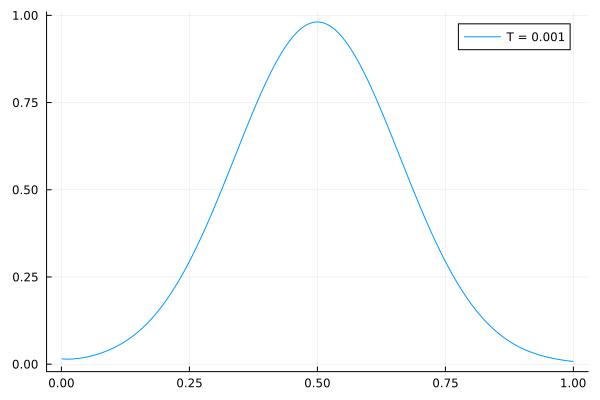

In [135]:
η = x -> exp(-20*(x - 1/2)^2);
m = 999;
T = 0.001;

sol = BE(m,η,T);
plot(sol[2],sol[1],label="T = $T")

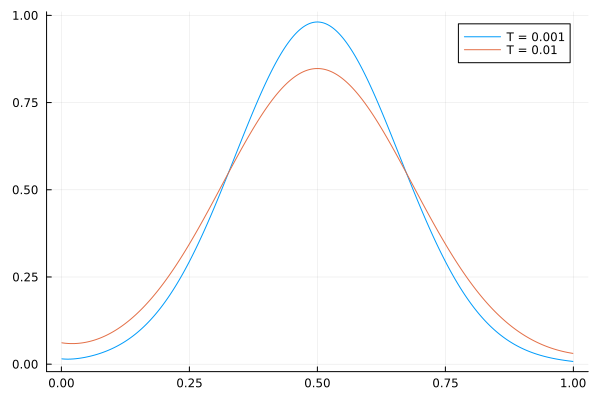

In [126]:
T = 0.01; 
sol = BE(m,η,T);
plot!(sol[2],sol[1],label="T = $T")

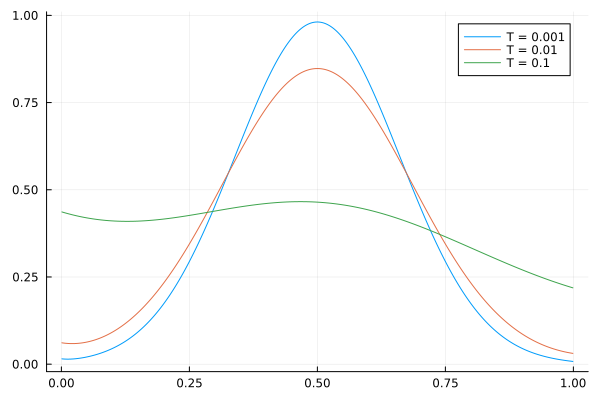

In [127]:
T = 0.1; 
sol = BE(m,η,T);
plot!(sol[2],sol[1],label="T = $T")

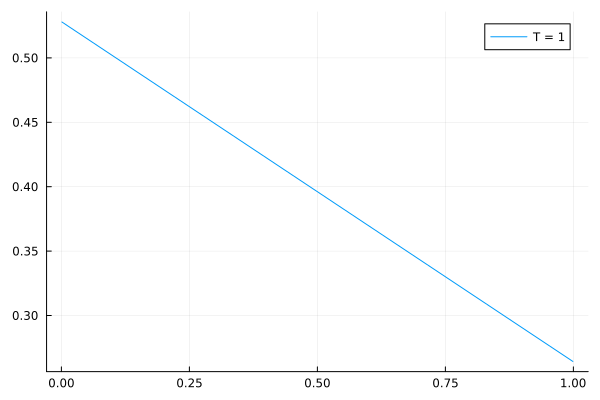

In [132]:
T = 1; 
sol = BE(m,η,T);
plot(sol[2],sol[1],label="T = $T")

## Problem 3

### Part A

A function to generate our data points

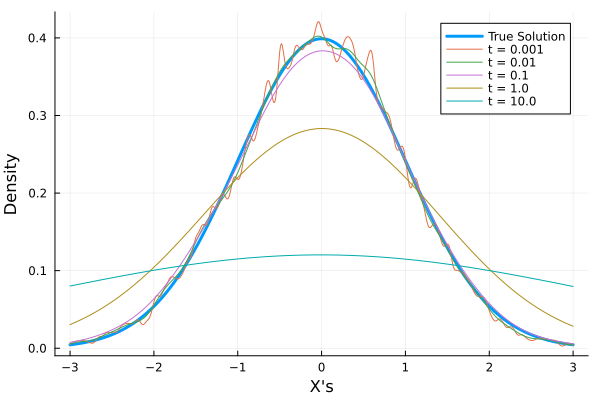

In [36]:
getTrueDensity = (x) -> 1/(sqrt(2 * pi))*exp(-x^2/2)
getApprox = (n,xs,t,points) -> map(xs -> sum(point -> begin (1/n)*(1/(sqrt(2*pi*t)))*exp(-(xs - point)^2/(2t)) end, points), xs)

n = 10000;
points = randn(n);
xs = -3:0.01:3;
ts = [0.001,0.01,0.1,1,10]; 

graph = plot(xs,map(getTrueDensity,xs),xlabel="X's",ylabel="Density",label="True Solution",linewidth=3);
for i=1:length(ts)
    graph = plot!(xs,getApprox(n,xs,ts[i],points),label="t = "*string(ts[i]));
end

savefig(graph,joinpath("..","pdf","images","3a1.png"))
display(graph)

### Part B

In [141]:
function prand(m)
    p = x -> -(2.0/3)* x .+ 4.0/3 .+ .5*sin.(2* pi * x )
    B = 1.7
    out = fill(0.,m)
        for j = 1: m
            u = 10.
            y = 0.
            while u >= p(y)/ B
                y = rand()
                u = rand()
            end
        out[j] = y
    end
    return out
end

prand (generic function with 1 method)

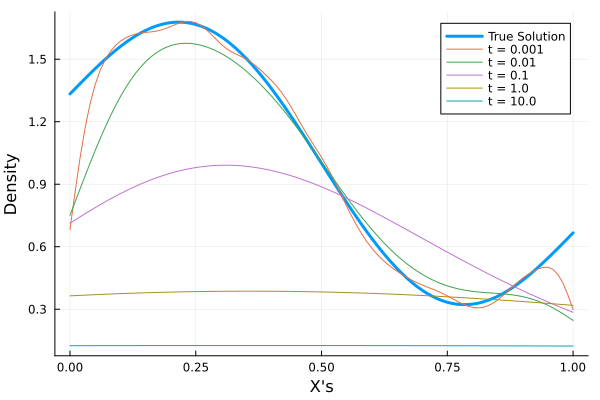

In [35]:
getTrueDensity = (x) -> -2x/3 + 4/3 + 1/2*sin(2*pi*x)
getApprox = (n,xs,t,points) -> map(xs -> sum(point -> begin (1/n)*(1/(sqrt(2*pi*t)))*exp(-(xs - point)^2/(2t)) end, points), xs)

n = 10000;
points = prand(n);
xs = 0:0.01:1;
ts = [0.001,0.01,0.1,1,10]; 

graph = plot(xs,map(getTrueDensity,xs),xlabel="X's",ylabel="Density",label="True Solution",linewidth=3);
for i=1:length(ts)
    graph = plot!(xs,getApprox(n,xs,ts[i],points),label="t = "*string(ts[i]));
end

savefig(graph,joinpath("..","pdf","images","3b1.png"))
display(graph)

## Question 4

In [2]:
function prand(m)
    p = x -> -(2.0/3)* x .+ 4.0/3 .+ .5*sin.(2* pi * x )
    B = 1.7
    out = fill(0.,m)
        for j = 1: m
            u = 10.
            y = 0.
            while u >= p(y)/ B
                y = rand()
                u = rand()
            end
        out[j] = y
    end
    return out
end

prand (generic function with 1 method)

In [1]:
function BE2(m,uInit,T)
    h = 1/(m+1);
    k = 10*h;
    s = 2;
    xs = (h:h:1-h)
    #create B
    B =  spzeros(m,m) + SymTridiagonal(fill(-2.0,m),fill(1.0,m-1));
    B[1,1] += s/(1+s);
    B[1,end] += s/(1+s);
    B[end,end] += 1/(1+s);
    B[end,1] += 1/(1+s);
    

    #BE
    u = uInit
    for i = k:k:T
        uNext = (I(m) - k/(2h^2) * B)\u
        u = uNext
    end
    return (u,xs)
end

BE2 (generic function with 1 method)

Let's set up the binning

In [4]:
m = 9999
h = 1/(m+1)
xs = (h:h:1-h)
s = 2

data = prand(m);
Y = zeros(length(xs))
for i=1:length(data)
    for j=1:m
        if data[i] >= j*h && data[i] < (j +1)*h
            Y[j] += 1
        end
    end
end

In [5]:
uInit = Y./(h*m)

sol1 = BE2(m,uInit,0.001)
sol2 = BE2(m,uInit,0.01)
sol3 = BE2(m,uInit,0.1)

([1.3319362545209137, 1.3319141118141928, 1.331891969518282, 1.3318698276155758, 1.331847686088468, 1.331825544919353, 1.3318034040906248, 1.3317812635846773, 1.331759123383904, 1.3317369834706978  …  0.666200643119673, 0.6661784971852232, 0.6661563516322263, 0.6661342064430782, 0.6661120616001747, 0.6660899170859111, 0.6660677728826828, 0.666045628972885, 0.6660234853389128, 0.6660013419631611], 0.0001:0.0001:0.9999)

In [32]:
getTrueDensity = (x) -> -2x/3 + 4/3 + 1/2*sin(2*pi*x)


plot(xs,map(getTrueDensity,xs),xlabel="X's",ylabel="Density",label="True Solution",linewidth=3);
plot!(sol1[2],sol1[1],label="t=0.001")
plot!(sol2[2],sol2[1],label="t=0.01")
plot!(sol3[2],sol3[1],label="t=0.1")
savefig(joinpath("..","pdf","images","4.png"))

"c:\\Users\\admin\\Desktop\\School\\UW\\2022-2023\\Spring\\AMATH_586\\HW3\\src\\pdf\\images\\4.png"